## Enunciado

1. Observe sus comportamientos en la casa, en la universidad y en el medio de transporte que
utiliza. Encuentre, para cada uno de estos escenarios sus reglas básicas.

2. Tome el plano de un barrio o un pueblo y encuentre los vértices de una vecindad de cada
polígono que se presenta de una vecindad de Voronoi.

3. Imprima un AC 1D en una impresora 3D.

4. Usted puede plantear un posible problema y su solución a través de AC.

5. Suponga que tiene un AC 2D, con un retículo cuadrado de 10.000 Celdas. El alfabeto, o conjunto de estados w = {Np, Ps, Cs, Cns, Ct, Pac}. Inicialmente el retículo se carga con 5.000 Ps distribuidos uniformemente y con 5 Cs y 5 Cns, también distribuidas aleatoriamente. Se usa la vecindad de Moore.

- Np = No hay nada en la celda 
- Ps = Personas sanas
- Cs = Persona con Covid-19 sintomática
- Cns = Persona con Covid-19 asintomática 
- Ct = Persona con Covid-19 en cuarentena o en cuidados médicos 
- Pac = Persona curada con anticuerpos 
- M = Persona muerta.

Reglas:

1. Si Ps tiene n vecinos Cs o Cns pasa con probabilidad n/10 a ser Cns con probabilidad 0.4; o Cs con probalididad 0.7.
2. Cs después de 7 ciclos pasa a Ct.
3. Cns después de 30 ciclos pasa a Pa.
4. Ct después de 20 ciclos con probabilidad 0.8 pasa a Pa; con probabilidad de 0.2 pasa a M que no se representa en el retículo.
5. Una vez se han ejecutado estas reglas en paralelo, desplaza cada celda a una celda Norte,
Sur, Este u oeste con probabilidad 0.25, si la celda está vacía. 

Se debe llevar el número de ciclos para las celdas Cs, Cns y Ct. Se debe llevar el conteo de M. En cada ciclo se debe llevar el conteo de cada tipo de celda.

Con la simulación se busca responder las preguntas siguientes:
1. ¿Después de cuántos ciclos se estabiliza la población? 
2. ¿Cuántas celdas de cada estado quedan? 
3. ¿Cuántos muertos hubo?

## Desarrollo

In [3]:
# Librerias

import cv2
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import random
import pygame
import copy
## Configuracion pygame
from pygame.locals import (K_ESCAPE,KEYDOWN,QUIT)

In [10]:
# Versión de python y librerias usadas
!pipreqsnb ./IA_2_AutomatasCelulares.ipynb
!cp requirements.txt requirements2.txt
!echo '#versión de python y librerias usadas'>requirements.txt
!python3 --version >>requirements.txt
!cat requirements2.txt >>requirements.txt
!rm requirements2.txt
!cat requirements.txt


pipreqs  --savepath ./requirements.txt /home/esteban/Esteban/UN/semester11/InteligenciaArtificialYMiniRobots/GitHub/Parte2/IA_2_AutomatasCelulares/__temp_pipreqsnb_folder
INFO: Successfully saved requirements file in ./requirements.txt
#versión de python y librerias usadas
Python 3.10.6
matplotlib==3.6.1
numpy==1.21.5
opencv_python==4.6.0.66
pygame==2.1.2
scipy==1.9.3




### 1. Reglas básicas en la Casa, Univesidad y en bicicleta

Según los diferentes entornos, estas son las reglas básicas que se identifican:

#### En la casa

* Alimentarse.
* Mantener el orden.
* Atender los requerimiento universitarios.
* Leer y orar.

#### En la Universidad
* Ir a la capellanía y orar.
* Poner atención a clase y escribir.
* Socializar.

#### En la bicicleta

* No ser atropellado.
* No atropellar a nadie.
* Pedalear según el nivel de agotamiento.
* Respetar las normas de tránsito.

### 2. Plano de Guadalupe-Huila y vecindad de Voronoi


Un diagrama de Voronoi, cuyo nombre es acuñado por el matemático ruso Georgy Voronoi, es aquel que le asigna a cada punto la región más cercana con respecto a los demás puntos (Grima, 2017). La frontera enre dos regiones se le donomina mediatrices (Grima, 2017). Un ejemplo se presenta el Figura 1 y la pertenencia de una punto se visualiza en la Figura 2 cuando por ejemplo se agrega un punto verde.

Figura 1.

Diagrama de Voronoi para ocho puntos.

![Diagrama de Voronoi](./figs/VoronoiOchoPuntos.png)

*Nota. El gráfico representa el digrama de Voronio para ocho puntos. Tomado de LOS DIAGRAMAS DE VORONOI - La forma matemática de dividir el mundo (p. 8). Expósito Rodriguez, s. f.*

Figura 2.

Diagrama de Voronoi para ocho puntos al agregar un punto verde.

![Diagrama de Voronoi](./figs/VoronoiOchoPuntosEjemplo.png)

*Nota. El gráfico representa el digrama de Voronio para ocho puntos al agregársele un punto. Tomado de LOS DIAGRAMAS DE VORONOI - La forma matemática de dividir el mundo (p. 8). Expósito Rodriguez, s. f.*


En el siguiente ejemplo se va a tomar un mapa de Guadalupe-Huila y según los restaurantes que aparezcan se va a hallar el esquema de Voronoi.

(([], []), ([], []))

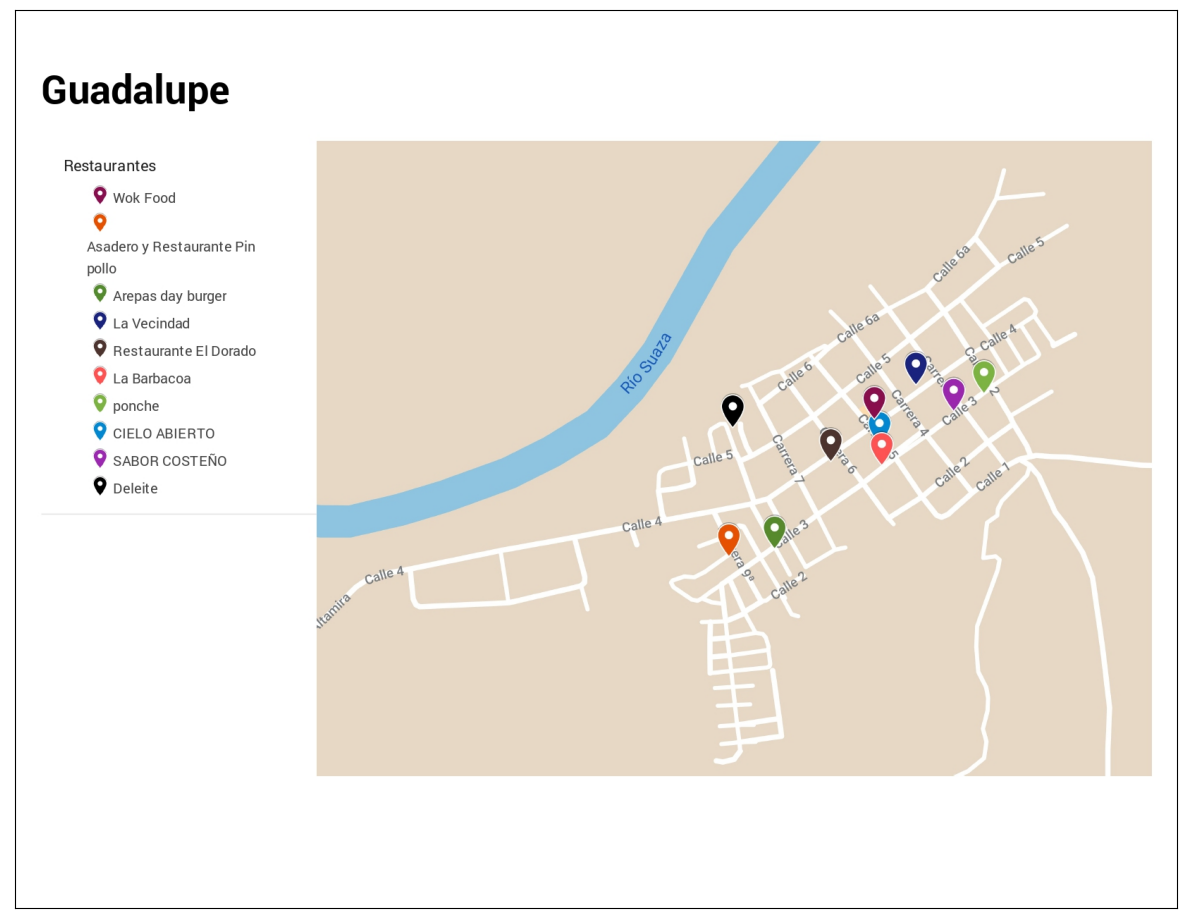

In [121]:
# Se importan el plano
plano= cv2.imread(f'./figs/GuadalupeRestaurantes.jpg')

# Se pasa de BGR a RGB
plano=cv2.cvtColor(plano,cv2.COLOR_BGR2RGB)
n=plano.shape[0]
m=plano.shape[1]

# Se imprime
plt.figure(figsize=(15, 15))
plt.imshow(plano)
plt.xticks([]),plt.yticks([])



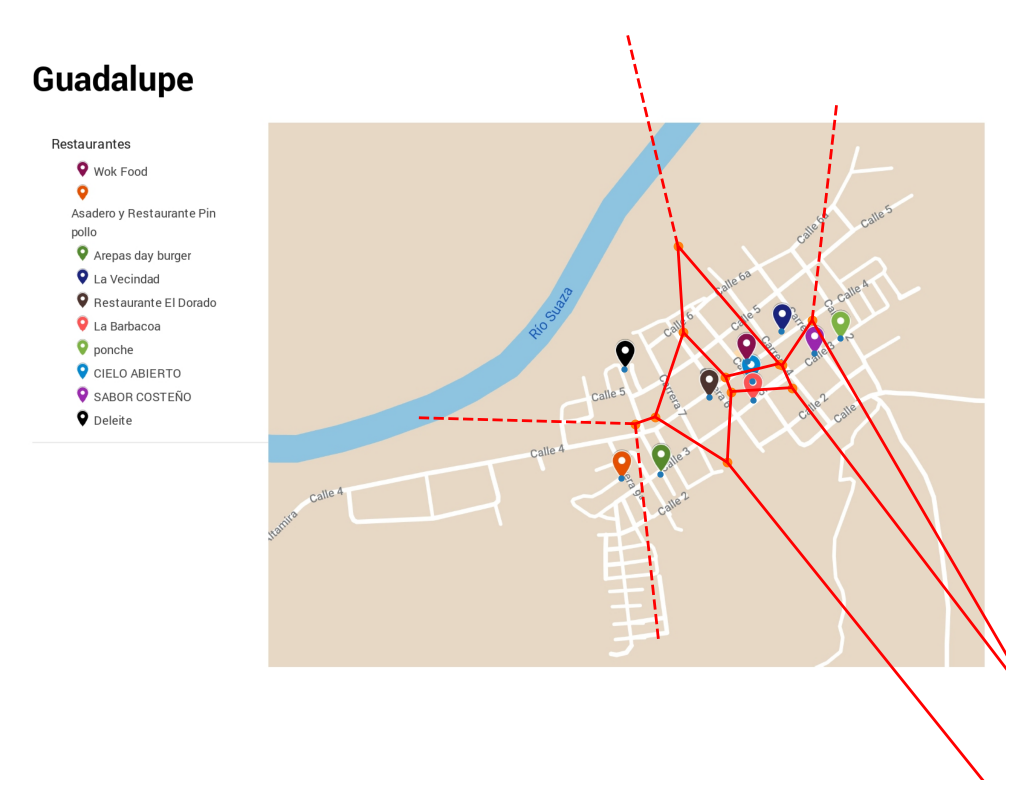

In [122]:
# Puntos en los que están los restaurantes
points = np.array([
    [1012,775],
    [1077,768],
    [1017,594],
    [1157,641],
    [1220,581],
    [1228,614],
    [1230,645],
    [1277,532],
    [1331,568],
    [1374,543]
    ],dtype=np.uint16)

# Tomado de The SciPy community. (s. f.)

vor = Voronoi(points)
# Tomado de Expósito Rodriguez, C. (s. f.).

fig1 = plt.figure(figsize=(20,10))
ax = fig1.add_subplot(111)
ax.imshow(plano)
voronoi_plot_2d(vor,point_size=7, ax=ax, show_vertices=True, line_colors='red', line_alpha=1, line_width=2)
ax.set_xlim(0, m)
ax.set_ylim(0, n)
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()


EL restaurante *Cielo Abierto* debe considerar cambiar de lugar dado que ocupa menos área o bajar sus precios.

### 5. Autómata celuar 2D de COVID-19

Covención de colores

- Np (No hay nada en la celda): Negro rgb(000,000,000)
- Ps (Personas sanas): Amarillo rgb(255,255,0)
- Cs (Persona con Covid-19 sintomática): Verde rgb(0,255,0)
- Cns (Persona con Covid-19 asintomática ): Rosada rgb(255,0,128)
- Ct (Persona con Covid-19 en cuarentena o en cuidados médicos): Rojo rgb(255,0,0)
- Pac (Persona curada con anticuerpos): Azul rgb(0,0,255)
- M (Persona muerta): Negro rgb(0,0,0)

Ciclos:0, Np:4990, Ps:5000,Cs: 5, Cns:5, Ct:0, Pac:0, M:0
Ciclos:1, Np:4990, Ps:4994,Cs: 9, Cns:7, Ct:0, Pac:0, M:0
Ciclos:2, Np:4990, Ps:4987,Cs: 15, Cns:8, Ct:0, Pac:0, M:0
Ciclos:3, Np:4990, Ps:4978,Cs: 20, Cns:12, Ct:0, Pac:0, M:0
Ciclos:4, Np:4990, Ps:4966,Cs: 27, Cns:17, Ct:0, Pac:0, M:0
Ciclos:5, Np:4990, Ps:4955,Cs: 33, Cns:22, Ct:0, Pac:0, M:0
Ciclos:6, Np:4990, Ps:4939,Cs: 40, Cns:31, Ct:0, Pac:0, M:0
Ciclos:7, Np:4990, Ps:4919,Cs: 49, Cns:42, Ct:0, Pac:0, M:0
Ciclos:8, Np:4990, Ps:4897,Cs: 54, Cns:50, Ct:9, Pac:0, M:0
Ciclos:9, Np:4990, Ps:4876,Cs: 63, Cns:56, Ct:15, Pac:0, M:0
Ciclos:10, Np:4990, Ps:4850,Cs: 77, Cns:63, Ct:20, Pac:0, M:0
Ciclos:11, Np:4990, Ps:4823,Cs: 90, Cns:70, Ct:27, Pac:0, M:0
Ciclos:12, Np:4990, Ps:4795,Cs: 97, Cns:85, Ct:33, Pac:0, M:0
Ciclos:13, Np:4990, Ps:4759,Cs: 111, Cns:100, Ct:40, Pac:0, M:0
Ciclos:14, Np:4990, Ps:4720,Cs: 131, Cns:110, Ct:49, Pac:0, M:0
Ciclos:15, Np:4990, Ps:4678,Cs: 133, Cns:136, Ct:63, Pac:0, M:0
Ciclos:16, Np:4990, Ps:463

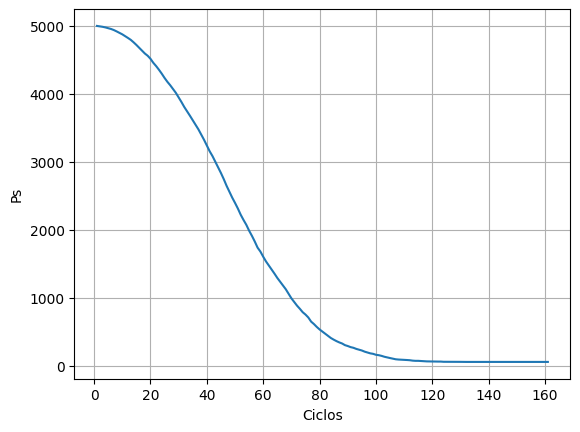

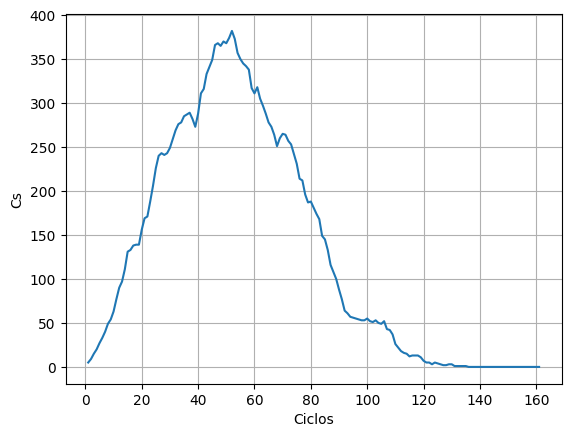

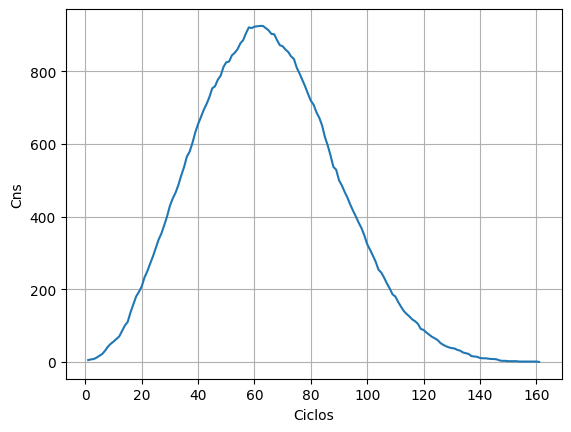

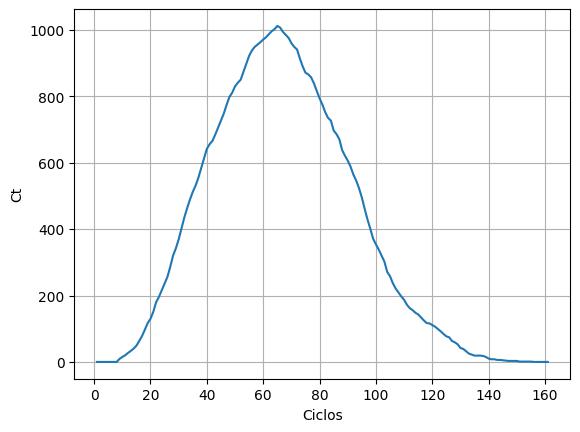

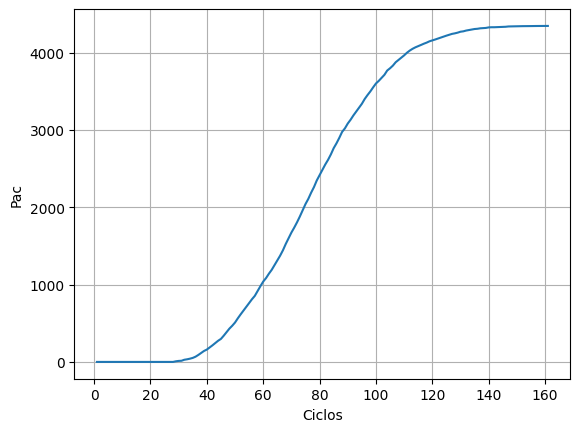

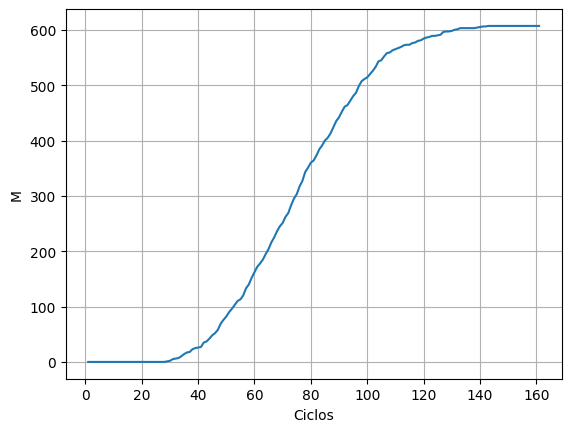

In [4]:
## Constantes
longitud_L=10_000 # Longitud retículo
nPs=5_000
nCs=5
nCns=5
n =int(longitud_L**0.5) # filas
m=int(longitud_L**0.5) # Columnas
rgbNp=[0,0,0] # Color de Np
rgbPs=[255,255,0]
rgbCs=[0,255,0]
rgbCns=[255,0,128]
rgbCt=[255,0,0]
rgbPac=[0,0,255]
rgbM=[0,0,0]


## Variables
SCREEN_WIDTH = 800
SCREEN_HEIGHT = 600
clock_velocity=10
contadorCiclos=0

lis_ciclos=[]
lis_Ps=[]
lis_Cs=[]
lis_Cns=[]
lis_Ct=[]
lis_Pac=[]
lis_M=[]
resConCel=[]
## Clases

class Celda:
    def __init__(self,estado,pos1D,col,fil):
        self.__estado = estado # Clases privadas
        self.columnas=col
        self.filas=fil
        self.__pos1D=pos1D
        self.__pos2D=self.funPosicion2D()
        self.color=self.funColor()
        self.numeroDeCiclos=0

    def get_estado(self):
        return self.__estado
    def set_estado(self,nuevoEstado):
        self.__estado=nuevoEstado
        self.color=self.funColor()

    def get_pos1D(self):
        return self.__pos1D
    def set_pos1D(self,nuevaPos1D):
        self.__pos1D=nuevaPos1D
        self.__pos2D=self.funPosicion2D()

    def get_pos2D(self):
        return self.__pos2D
    def set_pos2D(self,nuevaPos2D):
        self.__pos2D=nuevaPos2D
        self.__pos1D=self.funPos1DFromPos2D()

    def funColor(self):
        if self.get_estado()=='Np':
            return rgbNp
        elif self.get_estado()=='Ps':
            return rgbPs
        elif self.get_estado()=='Cs':
            return rgbCs
        elif self.get_estado()=='Cns':
            return rgbCns
        elif self.get_estado()=='Ct':
            return rgbCt
        elif self.get_estado()=='Pac':
            return rgbPac
        else:
            return rgbM
    
    def funPosicion2D(self):
        return [int(self.__pos1D/self.columnas),self.__pos1D%self.columnas]
    
    def funPos1DFromPos2D(self):
        return self.__pos2D[0]*self.columnas+self.__pos2D[1]

## Funciones

def pos1DFromPos2D2(pos2D):
    return pos2D[0]*m+pos2D[1]

def nValida(n,movY):
    if movY>=n:
        return 0
    elif movY<0:
        return n-1
    return movY

def mValida(m,movX):
    if movX>=m:
        return 0
    elif movX<0:
        return m-1
    return movX

def rgbPos2D(pos):
    lis=[]
    for chanel in [0,1,2]:
        lis.append(L[pos[0],pos[1],chanel])
    return lis

def movDer(celda):
    movX=celda.get_pos2D()[1]+1
    
    if movX>=celda.columnas:
        # celda.pos2D[1]= 0
        return [celda.get_pos2D()[0],0]
    else:
        # celda.pos2D[1]= movX
        return [celda.get_pos2D()[0],movX]

def movIzq(celda):
    movX=celda.get_pos2D()[1]-1
    
    if movX<0:
        # celda.pos2D[1]= celda.columnas-1
        return [celda.get_pos2D()[0],celda.columnas-1]
    else:
        # celda.pos2D[1]= movX
        return [celda.get_pos2D()[0],movX]
        
def movArr(celda):
    movY=celda.get_pos2D()[0]-1
    if movY<0:
        # celda.pos2D[0]= celda.filas-1
        return [celda.filas-1,celda.get_pos2D()[1]]
        
    else:
        # celda.pos2D[0]= movY
        return [movY,celda.get_pos2D()[1]]

def movAba(celda):
    movY=celda.get_pos2D()[0]+1
    if movY>=celda.filas:
        # celda.pos2D[0]= 0
        return [0,celda.get_pos2D()[1]]

    else:
        # celda.pos2D[0]= movY
        return [movY,celda.get_pos2D()[1]]

def regla1(celda):
    
    if celda.get_estado()=='Ps':
        n=L.shape[0]
        m=L.shape[1]
        

        pos=celda.get_pos2D()
        # n1 | n2 | n3
        # n4 | pos | n6
        # n7 | n8 | n7
        
        # Se buscan los vecinos según moore
        n1=[nValida(n,pos[0]-1),mValida(m,pos[1]-1)]
        n2=[nValida(n,pos[0]-1),mValida(m,pos[1])]
        n3=[nValida(n,pos[0]-1),mValida(m,pos[1]+1)]
        n4=[nValida(n,pos[0]),mValida(m,pos[1]-1)]
        n6=[nValida(n,pos[0]),mValida(m,pos[1]+1)]
        n7=[nValida(n,pos[0]+1),mValida(m,pos[1]-1)]
        n8=[nValida(n,pos[0]+1),mValida(m,pos[1])]
        n9=[nValida(n,pos[0]+1),mValida(m,pos[1]+1)]

        contadorVecinosContagiados=0


        for nn in [n1,n2,n3,n4,n6,n7,n8,n9]:
            if rgbPos2D(nn)==rgbCs or rgbPos2D(nn)==rgbCns:
                contadorVecinosContagiados+=1

        pCnsOCs=contadorVecinosContagiados/10

        # 0 si sigue sano y 1 si pasa a Cns o Cs
        ResultadoPCnsOCs=np.random.choice([0,1],1,p=[1-pCnsOCs,pCnsOCs])

        if ResultadoPCnsOCs==1:
            CnsOCs=np.random.choice([0,1],1,p=[0.4,0.6])
            if CnsOCs==0:
                celda.set_estado('Cns')
            else:
                celda.set_estado('Cs')
        
        # Se actualiza el color de la celda
        # celda.actualizarColor
    return

def regla2(celda):
    if celda.numeroDeCiclos>=7 and celda.get_estado()=='Cs':
        celda.set_estado('Ct')
        celda.numeroDeCiclos=0
    return

def regla3(celda):
    if celda.numeroDeCiclos>=30 and celda.get_estado()=='Cns':
        celda.set_estado('Pac')
        celda.numeroDeCiclos=0
    return

def regla4(celda):
    if celda.numeroDeCiclos>=20 and celda.get_estado()=='Ct':
        
        # Con 0.2 ct pasa a M y con 0.8 ct pasa a Pa
        MOPa=np.random.choice([0,1],1,p=[0.2,0.8])
        
        if MOPa==1:
            # print('adfdafdas')
            celda.set_estado('Pac')
        else:
            celda.set_estado('M')

        celda.numeroDeCiclos=0  
    return

def actualizarColoresBackground(celda):

    # Configuación del R
    L[celda.get_pos2D()[0],celda.get_pos2D()[1],0]=celda.color[0]

    # Configuación del G
    L[celda.get_pos2D()[0],celda.get_pos2D()[1],1]=celda.color[1]

    # Configuación del B
    L[celda.get_pos2D()[0],celda.get_pos2D()[1],2]=celda.color[2]

    return

def regla5(list_celdas):
    # Se ordena la lista según su posición
    list_celdas.sort(key=lambda celda: celda.get_pos1D(), reverse=False)

    for i in range(len(list_celdas)):

        if list_celdas[i].color!=rgbNp:    
            mov=np.random.randint(4)
            anteriorPos2D=list_celdas[i].get_pos2D()
            
            if mov==0:
                nuevaPos2D=movArr(list_celdas[i])
            elif mov==1:
                nuevaPos2D=movDer(list_celdas[i])
            elif mov==2:
                nuevaPos2D=movAba(list_celdas[i])
            else:
                nuevaPos2D=movIzq(list_celdas[i])

            # Se verifica que la celda esté Vacia
            if list_celdas[pos1DFromPos2D2(nuevaPos2D)].color==rgbNp:

                # Se intercambian de posición las celdas
                auxCelda=copy.copy(list_celdas[pos1DFromPos2D2(nuevaPos2D)])

                list_celdas[i].set_pos2D(nuevaPos2D)
                list_celdas[list_celdas[i].get_pos1D()] =list_celdas[i]

                auxCelda.set_pos2D(anteriorPos2D)
                list_celdas[auxCelda.get_pos1D()]=auxCelda
    return

def reglas(list_celdas):

    # Se ejecutan en paralelo dado que el background permance
    # constante
    for celda in list_celdas:
        
        regla1(celda)
        regla2(celda)
        regla3(celda)
        regla4(celda)
    
    for celda in list_celdas:
        actualizarColoresBackground(celda)
    

    regla5(list_celdas)

    for celda in list_celdas:
        actualizarColoresBackground(celda)
    return

def aumentadorCiclo(lisCeldas):

    for celda in lisCeldas:
        if celda.get_estado()=='Cs':
            # print(f'Holasss{celda.numeroDeCiclos}')
            celda.numeroDeCiclos+=1
        elif celda.get_estado()=='Cns':
            # print(f'Holasss{celda.numeroDeCiclos}')
            celda.numeroDeCiclos+=1
        elif celda.get_estado()=='Ct':
            # print(f'Holasss{celda.numeroDeCiclos}')
            celda.numeroDeCiclos+=1
    return

def conteoCeldas(lisCeldas):
    contador=[0,0,0,0,0,0,0]

    for celda in lisCeldas:
        if celda.get_estado()=='Np':
            contador[0]+=1
        elif celda.get_estado()=='Ps':
            contador[1]+=1
        elif celda.get_estado()=='Cs':
            contador[2]+=1
        elif celda.get_estado()=='Cns':
            contador[3]+=1
        elif celda.get_estado()=='Ct':
            contador[4]+=1
        elif celda.get_estado()=='Pac':
            contador[5]+=1
        elif celda.get_estado()=='M':
            contador[6]+=1
    return contador

## Se crea una imagen blanca RGB
L=np.ones((m,n,3),dtype=np.uint8)*255

## creación de celdas
## Se extrae un lista aleatoria sin repetirse de posiciones
posicionesOcupadas=random.sample(np.arange((longitud_L)).tolist(),
    nPs+nCs+nCns)

lisTotal=[]
contador=0
while contador<nPs:
    lisTotal.append(Celda('Ps',posicionesOcupadas[contador],m,n))
    contador+=1

while contador<nPs+nCs:
    lisTotal.append(Celda('Cs',posicionesOcupadas[contador],m,n))
    contador+=1

while contador<nPs+nCs+nCns:
    lisTotal.append(Celda('Cns',posicionesOcupadas[contador],m,n))
    contador+=1

posicionesOcupadas.sort()

# Creación de celdas vacias
contador=0
for i in range(m*n):
    if i==posicionesOcupadas[contador]:
        
        if contador+1<len(posicionesOcupadas):
            contador+=1

        continue
    
    lisTotal.append(Celda('Np',i,m,n))


# Creación de imagen 

for i in lisTotal:
    # Configuación del R
    L[i.get_pos2D()[0],i.get_pos2D()[1],0]=i.color[0]

    # Configuación del G
    L[i.get_pos2D()[0],i.get_pos2D()[1],1]=i.color[1]

    # Configuación del B
    L[i.get_pos2D()[0],i.get_pos2D()[1],2]=i.color[2]

# Creación de background 
background = pygame.surfarray.make_surface(L)

# Ajuste de pygame según el sistema operativo
pygame.init()

## https://www.pygame.org/wiki/WindowResizing
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT), pygame.locals.RESIZABLE)

# Setup the clock for a decent framerate
clock = pygame.time.Clock()


# Variable to keep the main loop running
running = True

# Input text
# https://www.geeksforgeeks.org/how-to-create-a-text-input-box-with-pygame/

## basic font for user typed
base_font = pygame.font.Font(None, 32)
user_text = f'{clock_velocity}'

# aaa=Celda('Ct',0.0,34,12,12)

# Main loop
while running:
    # Look at every event in the queue

    for event in pygame.event.get():

        # Did the user hit a key?
        if event.type == KEYDOWN:

            # Was it the Escape key? If so, stop the loop.
            if event.key == K_ESCAPE:
                running = False
    

        # Did the user click the window close button? If so, stop the loop.
        elif event.type == QUIT:
            running = False

        # https://www.geeksforgeeks.org/how-to-create-a-text-input-box-with-pygame/

        if event.type == pygame.KEYDOWN:
  
            # Check for backspace
            if event.key == pygame.K_BACKSPACE:
  
                # get text input from 0 to -1 i.e. end.
                user_text = user_text[:-1]

                    # Check for backspace
            
            # Unicode standard is used for string
            # formation
            else:
                
                user_text += event.unicode
      
            if event.key == pygame.K_RETURN :
                try:
                    clock_velocity=int(user_text)
                    user_text=''
                except:
                    clock_velocity=10
                    user_text=''
                
                   
    # actualización de background 
    background = pygame.surfarray.make_surface(L)

    # Modificación del tamaño del background
    screen.fill((0, 0, 0))
    screen.blit(pygame.transform.scale(background, screen.get_size()), (0, 0))
   

    # Conteo de celdas
    resConCel=conteoCeldas(lisTotal)
    # print(f'ciclos: {ciclos}')
    print(f'Ciclos:{contadorCiclos}, Np:{resConCel[0]}, Ps:{resConCel[1]},Cs: {resConCel[2]}, Cns:{resConCel[3]}, Ct:{resConCel[4]}, Pac:{resConCel[5]}, M:{resConCel[6]}')
    lis_Ps.append(resConCel[1])
    lis_Cs.append(resConCel[2])
    lis_Cns.append(resConCel[3])
    lis_Ct.append(resConCel[4])
    lis_Pac.append(resConCel[5])
    lis_M.append(resConCel[6])

    # Aplicación de reglas
    reglas(lisTotal)
    
    # aumentador de ciclos
    aumentadorCiclo(lisTotal)
    contadorCiclos+=1
    lis_ciclos.append(contadorCiclos)

    # Texto
    # https://www.geeksforgeeks.org/how-to-create-a-text-input-box-with-pygame/

    text_surface = base_font.render(f'Vel: {clock_velocity}', True, (0, 0, 255))
      
    # render at position stated in arguments
    screen.blit(text_surface, (5, 5))
          
    # Without the call to .flip(), nothing is shown.
    pygame.display.flip()

    # Velocidad de ejecución
    clock.tick(clock_velocity)

    # Verificación de estabilidad

    if resConCel[2]+resConCel[3]+resConCel[4]==0:
        running= False
pygame.quit()

# Respuesta a preguntas
print(f'\nEstabilización en {contadorCiclos-1} ciclos')
print(f'Np:{resConCel[0]}, Ps:{resConCel[1]},Cs: {resConCel[2]}, Cns:{resConCel[3]}, Ct:{resConCel[4]}, Pac:{resConCel[5]}, M:{resConCel[6]}')


# Graficación
lis_nombres=['Ps','Cs','Cns','Ct','Pac','M']
lis_resultados=[lis_Ps,lis_Cs,lis_Cns,lis_Ct,lis_Pac,lis_M]

for i in range(len(lis_resultados)):
    fig, ax = plt.subplots()
    ax.plot(lis_ciclos, lis_resultados[i])

    ax.set(xlabel='Ciclos', ylabel=lis_nombres[i])
    ax.grid()

    # fig.savefig(f'{lis_nombres[i]}.png')
    plt.show()

#### Video

[![Video demostrativo de funcionamiento del programa](./figs/IA_2_Punto_5_AC2D.png)](https://drive.google.com/file/d/1NW9qI5OY8ZD847NOJE-kPjyj6aE1mHNz/view?usp=sharing)